# Importação dos dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
data_file = "/content/drive/MyDrive/TCC-UFF/curated-solubility-dataset.xlsx"

In [3]:
import pandas as pd

df = pd.read_excel (data_file, index_col = 1) #index=Name

#subset of columns
dfy = pd.DataFrame(df, columns= ['Solubility'])
dfx = pd.DataFrame(df, columns= ['SD', 'Ocurrences', 'Group', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors', 
                                'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
                                'NumSaturatedRings', 'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ', 'BertzCT'])

dfxy = pd.DataFrame(df, columns= ['Solubility', 'SD', 'Ocurrences', 'Group', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors',
                                    'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
                                    'NumSaturatedRings', 'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ', 'BertzCT'])

pd.DataFrame(dfxy.values, index=df.index, columns=dfxy.columns)


,Solubility,SD,Ocurrences,Group,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
Name,,,,,,,,,,,,,,,,,,,,,
Benzo[cd]indol-2(1H)-one,-3.25477,0,1,G1,169.183,2.4055,51.9012,13,1,1,2,0,62,2,0,1,3,29.1,75.1836,2.583,511.229
4-chlorobenzaldehyde,-2.17708,0,1,G1,140.569,2.1525,36.8395,9,1,0,2,1,46,1,0,0,1,17.07,58.2611,3.00978,202.661
"4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}methyl)-N,N-bis(oxiran-2-ylmethyl)aniline",-4.66206,0,1,G1,422.525,2.4854,119.076,31,6,0,6,12,164,2,4,4,6,56.6,183.183,1.08443,769.9
vinyltoluene,-3.12315,0,1,G1,118.179,2.63802,41.27,9,0,0,0,1,46,1,0,0,1,0,55.8366,3.07076,211.033
3-(3-ethylcyclopentyl)propanoic acid,-3.28612,0,1,G1,170.252,2.6775,47.9918,12,1,1,2,4,70,0,1,1,1,37.3,73.9737,2.14584,153.918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phenobarbital,-2.29,0.0956697,5,G5,232.239,0.7004,60.0924,17,3,2,5,2,88,1,1,1,2,75.27,98.1995,2.53597,461.784
pindolol,-3.79,0.0946338,3,G5,248.326,1.9056,72.9392,18,3,3,4,6,98,2,0,0,2,57.28,106.97,1.91431,493.255
procaine,-1.72,0.316388,4,G5,236.315,1.7674,68.9249,17,4,1,4,6,94,1,0,0,1,55.56,102.361,2.36946,344.942


#Transformação Box-Cox

In [4]:
from scipy import stats

In [5]:
for var_dfx in dfx:
  values_dfx = df.loc[::, var_dfx]
  Existe_str = False
  
  for element_values_dfx in values_dfx:
    if type(element_values_dfx) == str:
      Existe_str = True
    elif element_values_dfx < 0:
      Existe_str = True
    elif element_values_dfx == 0:
      Existe_str = True

  if Existe_str == False:
    print(var_dfx)
    values_dfx_boxcox, _ = stats.boxcox(values_dfx.values)
    dfx = dfx.drop(var_dfx, 1) ## '1' para deletar coluna
    dfxy = dfxy.drop(var_dfx, 1) ## '1' para deletar coluna
    dfx[var_dfx] = values_dfx_boxcox
    dfxy[var_dfx] = values_dfx_boxcox

###pd.DataFrame(dfx.values, index=dfx.index, columns=dfx.columns)

Ocurrences
MolWt
HeavyAtomCount
LabuteASA


# Distribuições: Box-plot

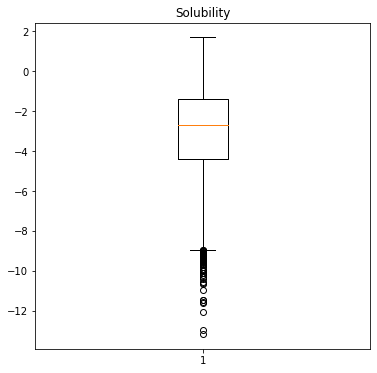

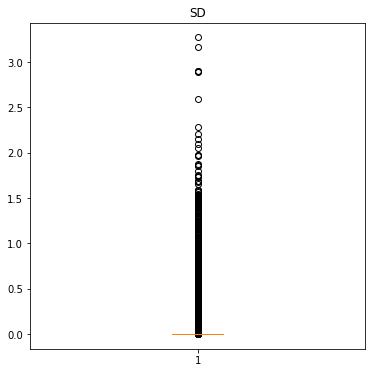

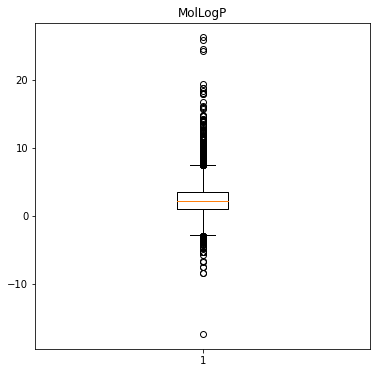

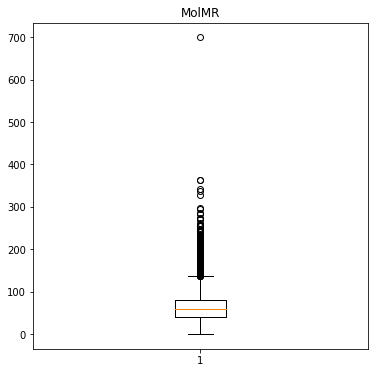

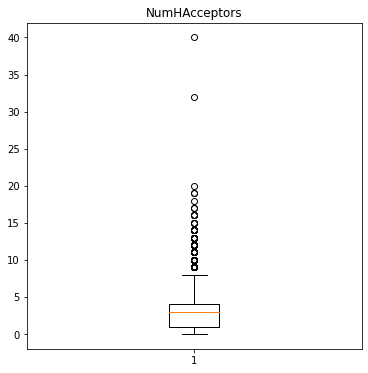

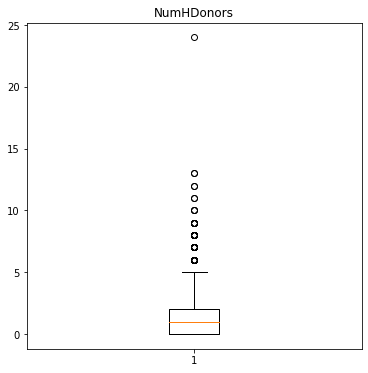

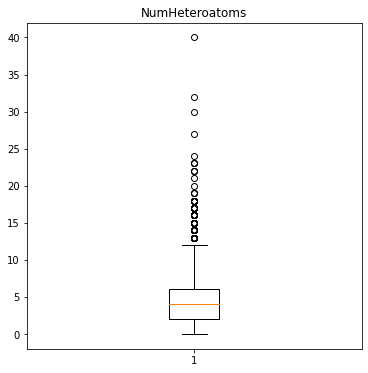

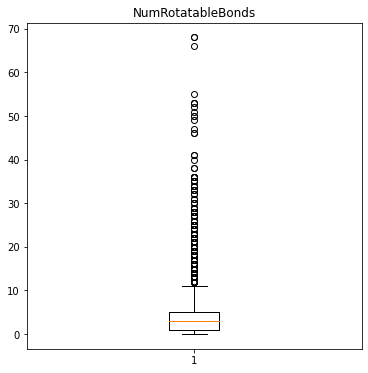

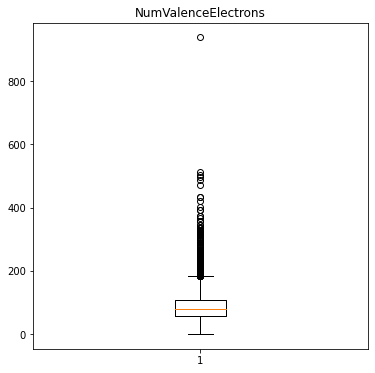

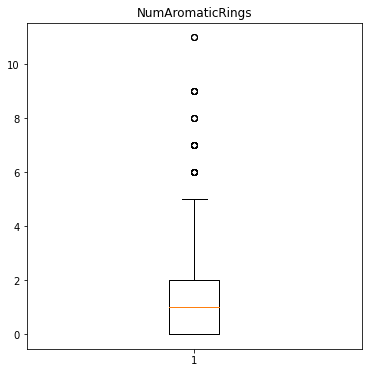

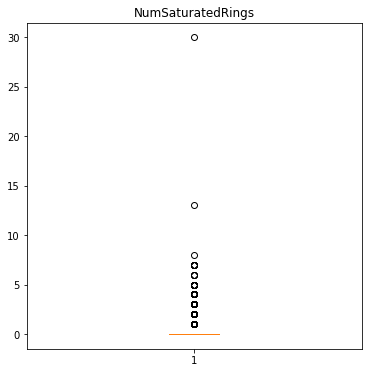

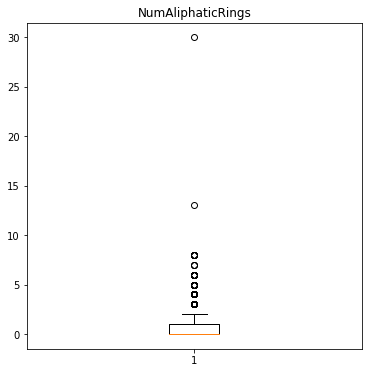

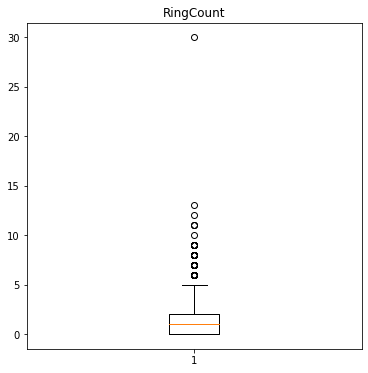

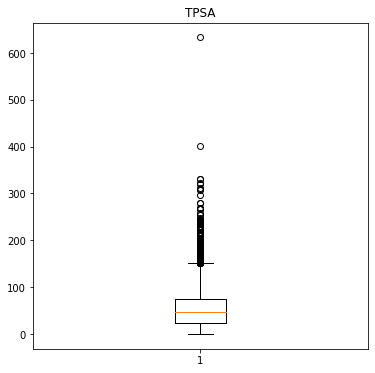

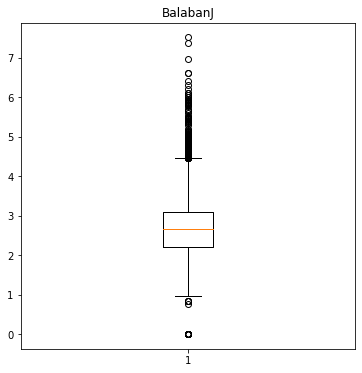

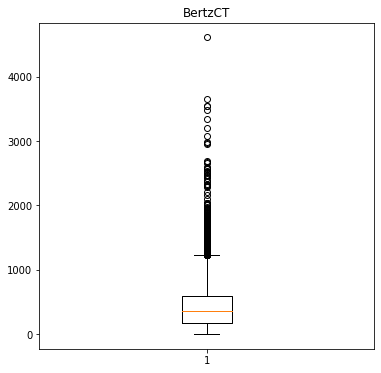

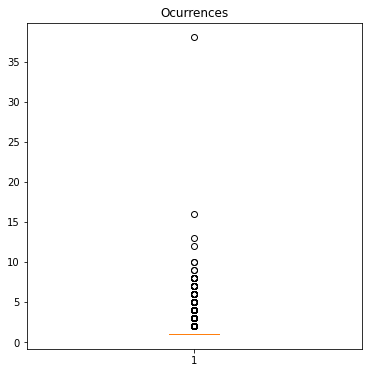

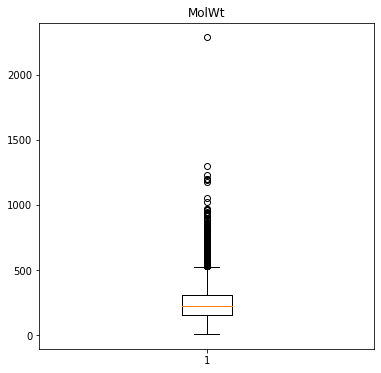

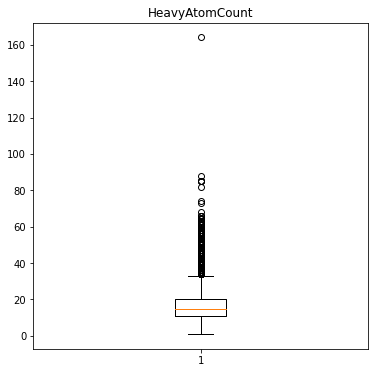

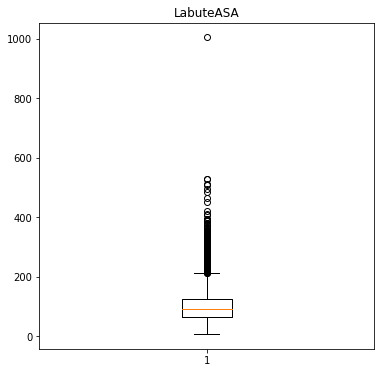

In [6]:
import matplotlib.pyplot as plt 
import numpy as np 


for name_dfxy in dfxy:
    Existe_str = False
    values_dfxy = df.loc[::, name_dfxy]
    
    for element_values_dfxy in values_dfxy:
        if type(element_values_dfxy) == str:
            Existe_str = True
            
    if Existe_str == False:
        values_dfxy_clean = values_dfxy[np.logical_not(np.isnan(values_dfxy))]

        fig = plt.figure(figsize =(6, 6)) 
        plt.title(name_dfxy)
        plt.boxplot(values_dfxy_clean)
        plt.show()
        


# Boxplot - categórica

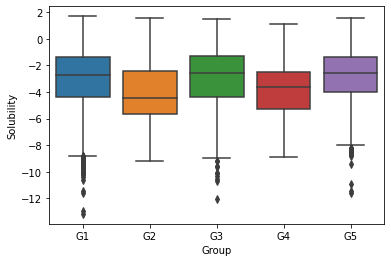

In [7]:
import seaborn as sns

ax = sns.boxplot(x="Group", y="Solubility", data = dfxy)
###ax = sns.swarmplot(x="Group", y="Solubility", data = dfxy, color=".25")


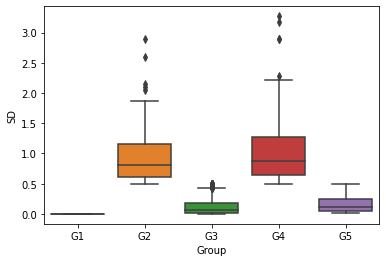

In [8]:
ax2 = sns.boxplot(x="Group", y="SD", data = dfxy)

In [9]:
import collections
import matplotlib.pyplot as plt


valores_grupo = dfxy['Group']
grupo = set(valores_grupo)

c = collections.Counter(valores_grupo)
###

tot_grupo = {}
for i in grupo:
    tot_grupo[i] = '%i' %(c[i])
    
result_tot = [tot_grupo[i] for i in grupo]
####

soma = sum ([c[i] for i in grupo])

perc_grupo = {}
for i in grupo:
    perc_grupo[i] = '%.1f' %(100 * c[i] / soma)
    
result_perc = [perc_grupo[i] for i in grupo]
    

In [10]:
pd.DataFrame(result_tot , index=grupo, columns=['Total'] )

,Total
G5,517
G2,191
G1,6473
G3,1000
G4,132


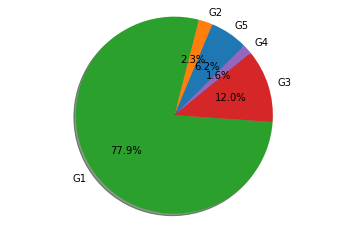

In [11]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

fig1, ax1 = plt.subplots()
ax1.pie(result_perc, labels=grupo, autopct='%1.1f%%', shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Estatística Básica

In [12]:
import numpy as np

tamanho = {}
tipo = {}
minimo = {}
maximo = {}
mediana = {}
media = {}
variancia = {}
desvPad = {}
n_classes = {}

for name_dfxy in dfxy:
    Existe_str = False
    values_dfxy = df.loc[::, name_dfxy]
    
    for element_values_dfxy in values_dfxy:
        if type(element_values_dfxy) == str:
            Existe_str = True
    
    if Existe_str == True: 
        values_dfxy_clean = [incom for incom in values_dfxy if str(incom) != 'nan']
    
        tamanho [name_dfxy] = len(values_dfxy_clean)
        tipo [name_dfxy] = 'Categórica'
        minimo [name_dfxy] = 'NA'
        maximo [name_dfxy] ='NA'
        mediana [name_dfxy] = 'NA'
        media [name_dfxy] = 'NA'
        variancia [name_dfxy] = 'NA'
        desvPad [name_dfxy] = 'NA'
        n_classes [name_dfxy] = len(set(values_dfxy_clean))
        
    else:
        values_dfxy_clean = values_dfxy[np.logical_not(np.isnan(values_dfxy))]
        
        tamanho [name_dfxy] = len(values_dfxy_clean)
        tipo [name_dfxy] = 'Discreta'
        minimo [name_dfxy] = "%.4f" %np.min(values_dfxy_clean)
        maximo [name_dfxy] = "%.4f" %np.max(values_dfxy_clean)
        mediana [name_dfxy] = "%.4f" %np.median(values_dfxy_clean)
        media [name_dfxy] = "%.4f" %np.mean(values_dfxy_clean)
        variancia [name_dfxy] = "%.4f" %np.var(values_dfxy_clean)
        desvPad [name_dfxy] = "%.4f" %np.std(values_dfxy_clean)
        n_classes [name_dfxy] = 'NA'
    
resultados = [(name_dfxy, tamanho[name_dfxy], tipo[name_dfxy], minimo[name_dfxy], maximo[name_dfxy], mediana[name_dfxy],
               media[name_dfxy], variancia[name_dfxy], desvPad[name_dfxy], n_classes[name_dfxy]) 
              for name_dfxy in dfxy]

headers=["Variável", "Tamanho", "Tipo", "Mínimo", "Máximo", "Mediana", "Média", "Variância","Desvio Padrão", "N Classes"]

pd.DataFrame(resultados,  columns=headers)



,Variável,Tamanho,Tipo,Mínimo,Máximo,Mediana,Média,Variância,Desvio Padrão,N Classes
0,Solubility,8313,Discreta,-13.1719,1.6988,-2.7100,-3.0222,5.4932,2.3438,NA
1,SD,8313,Discreta,0.0000,3.2702,0.0000,0.0631,0.0487,0.2206,NA
2,Group,8313,Categórica,NA,NA,NA,NA,NA,NA,5
3,MolLogP,8313,Discreta,-17.4064,26.2466,2.1489,2.4253,5.9620,2.4417,NA
4,MolMR,8313,Discreta,0.0000,699.5234,58.1180,63.6369,1179.2721,34.3405,NA
5,NumHAcceptors,8313,Discreta,0.0000,40.0000,3.0000,3.0444,5.5627,2.3585,NA
6,NumHDonors,8313,Discreta,0.0000,24.0000,1.0000,1.0295,1.7139,1.3092,NA
7,NumHeteroatoms,8313,Discreta,0.0000,40.0000,4.0000,4.4926,9.1478,3.0245,NA
8,NumRotatableBonds,8313,Discreta,0.0000,68.0000,3.0000,3.7511,22.0717,4.6981,NA
9,NumValenceElectrons,8313,Discreta,0.0000,938.0000,80.0000,88.2968,2213.0188,47.0427,NA


# Distribuições: Histogramas+Normais

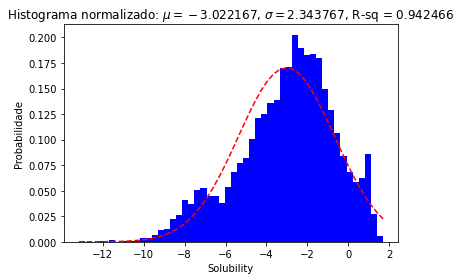

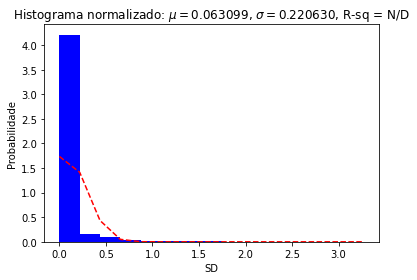

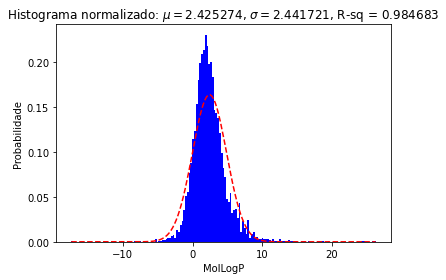

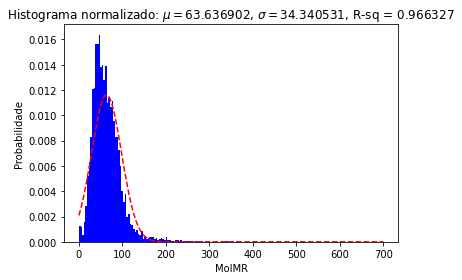

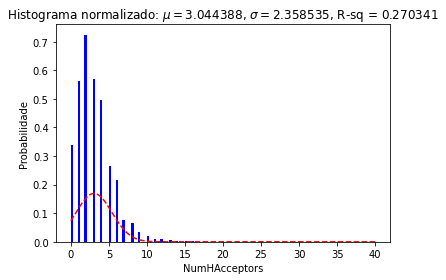

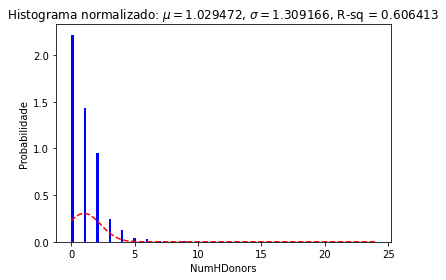

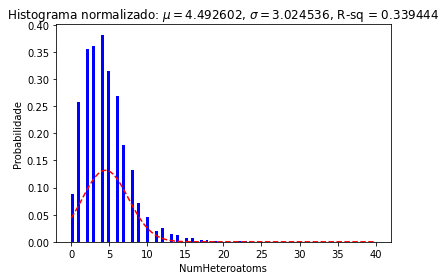

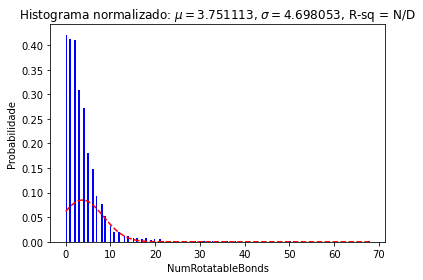

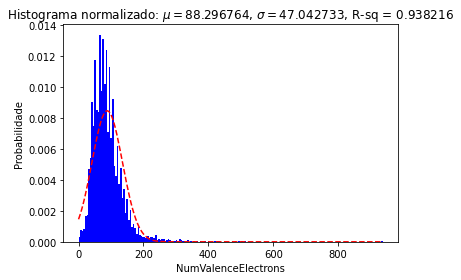

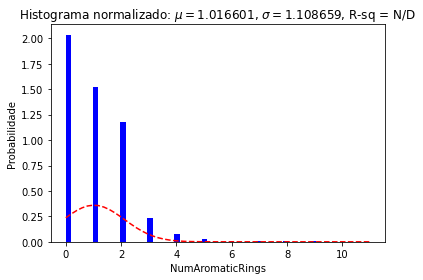

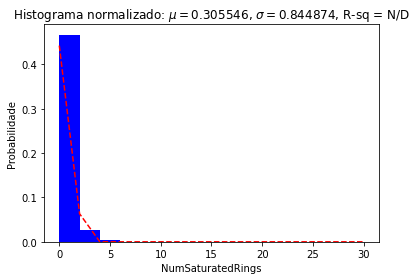

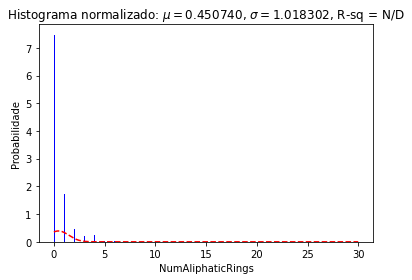

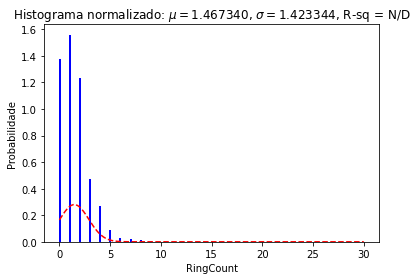

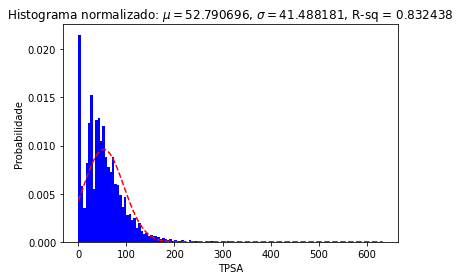

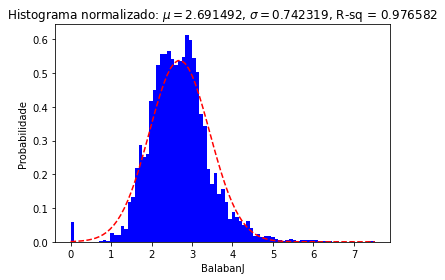

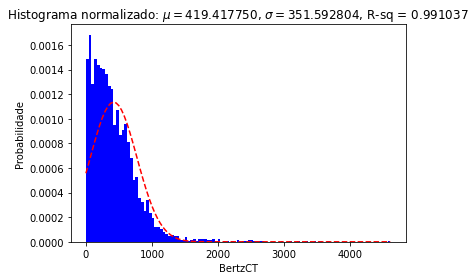

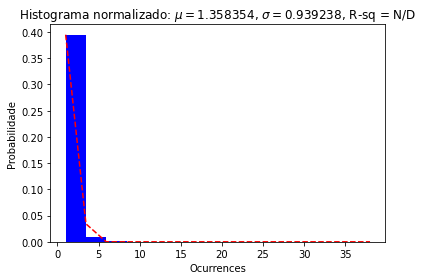

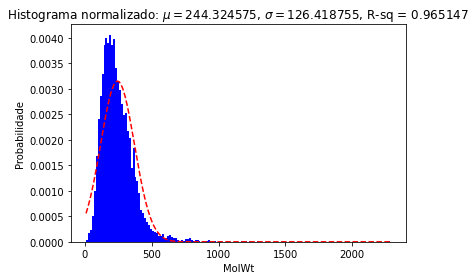

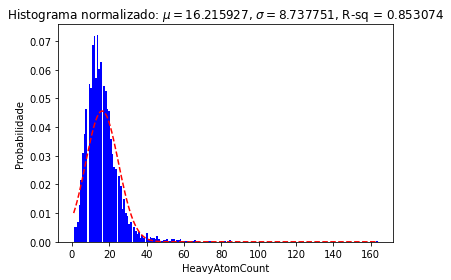

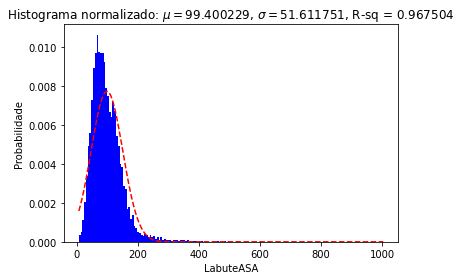

Total de variáveis com R-2 calculado: 13
Total de variáveis numéricas: 20
Total de variáveis: 21


In [13]:
import numpy as np 
from matplotlib import pyplot as plt 
from scipy import signal
import math
from scipy.stats import norm
from scipy.optimize import curve_fit


def func(x, a, b, c): # Gaussian peak
    return  a * np.exp(-0.5 * np.power((x-b) / c, 2.0))
    
n_var_num = 0
n_var_rqsd_calc = 0

for h_dfxy in dfxy:
    values_dfxy = df.loc[::, h_dfxy]
    Existe_str = False
    
    for element_values_dfxy in values_dfxy:
        if type(element_values_dfxy) == str:
            Existe_str = True
        
    if Existe_str == False:
        n_var_num = n_var_num + 1
        values_dfxy_clean = values_dfxy[np.logical_not(np.isnan(values_dfxy))]
        
        mean = np.mean(values_dfxy_clean)
        variance = np.var(values_dfxy_clean)
        sigma = np.sqrt(variance)
        
        # the histogram of the data
        n, bins, patches = plt.hist(values_dfxy_clean, bins = 'auto', density = True, facecolor='blue')
        
        xdata=[] #bins is a intervale form histogramn
        for ini in range(len(bins)-1):
            new_xdata=(bins[ini] + bins[ini + 1]) / 2
            xdata.append(new_xdata)
            
        xdata = np.array(xdata, dtype=float)       
        ydata = np.array(n, dtype=float)
        
        try:
            popt, pcov = curve_fit(func, xdata, ydata, p0=[1,mean,sigma], maxfev=100)
            residuals = ydata- func(xdata, *popt)
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((ydata - np.mean(ydata))**2)
            r_squared = 1 - (ss_res / ss_tot)
            plt.title(r'Histograma normalizado: $\mu=%f$, $\sigma=%f$, R-sq = %f' %(mean, sigma, r_squared))
            n_var_rqsd_calc = n_var_rqsd_calc + 1
        except:
            plt.title(r'Histograma normalizado: $\mu=%f$, $\sigma=%f$, R-sq = N/D' %(mean, sigma))
            pass
        
        # add a 'best fit' line
        y = norm.pdf(bins, mean, sigma)
        plt.plot(bins, y, 'r--')
        plt.xlabel(h_dfxy)
        plt.ylabel('Probabilidade')
        
        plt.show()

print ('Total de variáveis com R-2 calculado: %i' %n_var_rqsd_calc)
print ('Total de variáveis numéricas: %i' %n_var_num)
print ('Total de variáveis: %i' %len(dfxy.columns))


# Gráficos de Projeção (matriz scatter plot)

In [14]:
# Seaborn visualization library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Create the default pairplot
########sns.pairplot(df)

# Data image (a) EDM: Matriz distância Euclidiana; (b) similaridade gaussiana

In [15]:
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import numpy as np

dfxy_num = pd.DataFrame(df, columns= [ 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors',
                                    'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
                                    'NumSaturatedRings', 'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ', 'BertzCT'])

dist_Euclidiana = euclidean_distances(dfxy_num, dfxy_num)
pd.DataFrame(dist_Euclidiana, index=df.index, columns=df.index)


Name,Benzo[cd]indol-2(1H)-one,4-chlorobenzaldehyde,"4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}methyl)-N,N-bis(oxiran-2-ylmethyl)aniline",vinyltoluene,3-(3-ethylcyclopentyl)propanoic acid,"11,16,17,21-tetrahydroxypregna-1,4-diene-3,20-dione",4-(dimethylamino)benzaldehyde,2-methyl-1-phenylpropan-2-yl acetate,2-(4-tert-butylphenoxymethyl)oxirane,5-methoxy-1-[4-(trifluoromethyl)phenyl]pentan-1-one,1-chloro-3-(trifluoromethyl)benzene,"oxiran-2-ylmethyl 2,2-dimethyloctanoate",2-methylheptyl 3-sulfanylpropanoate,3-[2-(ethylamino)-1-hydroxyethyl]phenol,"2,4-dichloro-1-(chloromethyl)benzene","carboxymethyldimethyl-3-[[(3,3,4,4,5,5,6,6,7,7,8,8,8-tridecafluorooctyl)sulphonyl]amino]propylammonium hydroxide",2-benzyl-2-(dimethylamino)-1-[4-(morpholin-4-yl)phenyl]butan-1-one,"1,3-bis(prop-1-en-2-yl)benzene",molybdenum,"ethenyl 2,2-dimethyloctanoate","2-(morpholin-4-ylsulfanyl)-1,3-benzothiazole","(1R-(1alpha,2beta,4beta,6alpha))-2,2,7-Trimethyl-3-oxatricyclo(4.1.1.02,4)octane",2-[({4-[(oxiran-2-ylmethoxy)methyl]cyclohexyl}methoxy)methyl]oxirane,"6H-dibenzo[c,e][1,2]oxaphosphinine 6-oxide",ethenyl benzoate,methyl 4-tert-butylbenzoate,"2,2-dimethyl-3-(3-methylphenyl)propan-1-ol","(2E)-3,7-dimethylocta-2,6-dien-1-yl acetate","2-{6,6-dimethylbicyclo[3.1.1]hept-2-en-2-yl}ethan-1-ol","3,3,5-trimethylcyclohexanone",2-(2-phenylphenoxy)ethyl prop-2-enoate,"4-[2-(4-hydroxy-3,5-dimethylphenyl)propan-2-yl]-2,6-dimethylphenol","1,3-bis(octadecanoyloxy)propan-2-yl octadecanoate",5-Ethyl-2-methylpyridine,"(1R,2S,5R)-5-methyl-2-(propan-2-yl)cyclohexyl (2S)-2-hydroxypropanoate",2-phenoxyethyl 2-methylprop-2-enoate,fluoromethane,(2-phenoxyethoxy)benzene,"4-[(4-amino-2-chloro-3,5-diethylphenyl)methyl]-3-chloro-2,6-diethylaniline",2-propylpentanoic acid,...,Iodobenzene,Khellin,Methyl acetate,Methyl pentanoate,Methylparaben,Metoxuron,nifedipine,p-Chloroiodobenzene,Prednisolone,Risocaine,Testosterone,Ethylenedichloride,Hexachlorobenzene,"2,2',3,4,4',5'-Hexachlorobiphenyl",17-Methyl testosterone,m-Nitrotoluene,Phenacetin,Propane,"1,1,2,2-Tetrabromoethane","1,2,3,5-Tetrachlorobenzene","3,3',4,4'-Tetrachlorobiphenyl","1,2,3,4-Tetrachlorodibenzo-p-dioxin",Tetrachloroethylene,"1,3,5-Trichlorobenzene","1,2,4-Trichlorodibenzo-p-dioxin","1,1,1-Trichloroethane",Alachlor,Digoxin,b-Endosulfan,Parathion,Pebulate,Prasterone,acetazolamide,chlorpromazine,nalidixic_acid,phenobarbital,pindolol,procaine,thymol,warfarin
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Benzo[cd]indol-2(1H)-one,0.000000,311.402111,398.717425,307.145712,357.557032,355.930656,274.116084,211.923337,199.382526,165.463562,259.655758,287.381122,369.666166,250.044762,281.892639,566.884654,328.371988,224.160653,525.760725,336.226612,112.455761,296.293178,313.208023,195.532619,261.049111,196.267220,235.700251,280.834822,296.427218,366.166062,135.184684,162.095873,957.136069,339.928146,285.705399,186.720708,535.505806,164.940273,322.014498,419.030750,...,381.452621,332.599993,484.989981,454.856026,262.410245,159.707915,341.010981,372.271318,317.387213,233.317412,144.909409,514.699833,309.912918,234.555210,165.669791,257.256110,232.337347,532.833175,517.363671,283.928327,137.585932,186.678014,458.290340,344.168537,162.286291,495.560133,172.389025,1164.762607,256.064246,157.794319,374.678655,144.909385,135.442531,218.553902,169.958027,99.324254,101.022063,187.035126,261.206733,432.575745
4-chlorobenzaldehyde,311.402111,0.000000,663.190727,29.892090,68.092150,628.906865,40.684600,120.434495,143.118658,228.830496,69.384340,117.587734,112.755729,88.640762,67.885257,816.170175,602.317700,94.886125,218.465272,82.127195,276.584010,27.974293,145.839801,505.578810,52.064713,133.756816,91.583319,81.202144,42.023328,57.579244,405.574558,428.869686,1146.406345,33.222918,119.485875,153.224333,236.508661,180.153182,589.377413,112.262742,...,95.554237,640.409216,179.770004,144.501500,59.094948,195.863806,625.633631,114.358141,590.002881,99.111861,356.806844,204.630103,155.416749,483.34686

Text(0.5, 1.05, 'Distance Matrix')

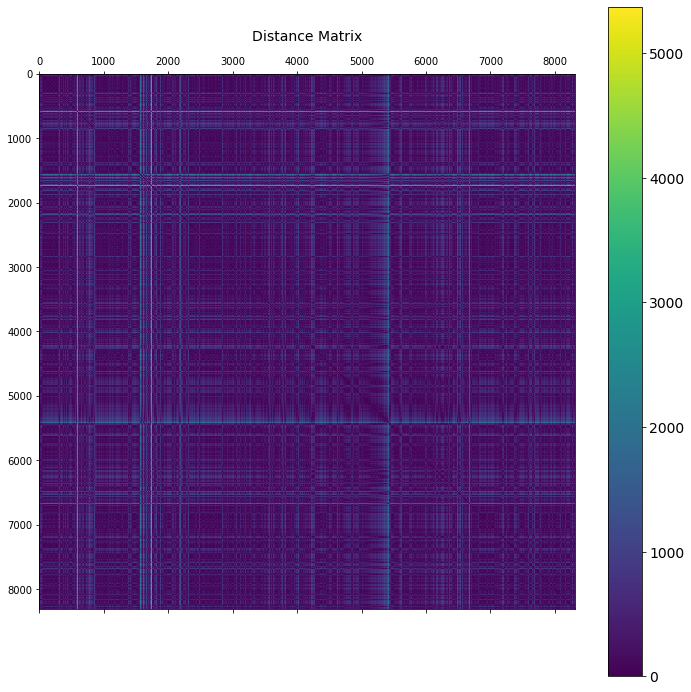

In [16]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(12, 12))
plt.matshow(dist_Euclidiana, fignum=f.number)
###plt.xticks(range(dist_Euclidiana.shape[1]), df.columns, fontsize=12, rotation=90)
###plt.yticks(range(dist_Euclidiana.shape[1]), dfxy_num.columns, fontsize=12)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Distance Matrix', fontsize=14)

# Matriz de correlação

In [17]:

coef_correlacao = np.absolute(dfxy_num.corr())
pd.DataFrame(coef_correlacao, index=dfxy_num.columns, columns=dfxy_num.columns)


,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
MolWt,1.000000,0.588818,0.943463,0.944615,0.581075,0.221896,0.672917,0.564776,0.941945,0.449822,0.246856,0.294991,0.561417,0.462928,0.972564,0.259165,0.811059
MolLogP,0.588818,1.000000,0.669080,0.550422,0.153468,0.378925,0.029994,0.463264,0.546995,0.359312,0.048376,0.007662,0.274391,0.313176,0.622313,0.160783,0.419071
MolMR,0.943463,0.669080,1.000000,0.976049,0.519361,0.179330,0.492670,0.634426,0.971120,0.489033,0.233082,0.290312,0.588612,0.383488,0.988339,0.310499,0.818665
HeavyAtomCount,0.944615,0.550422,0.976049,1.000000,0.634826,0.263204,0.605030,0.601215,0.991256,0.491114,0.280900,0.341276,0.626693,0.521959,0.988434,0.315726,0.859371
NumHAcceptors,0.581075,0.153468,0.519361,0.634826,1.000000,0.467393,0.805022,0.361654,0.636683,0.230938,0.238772,0.257480,0.364089,0.863491,0.577051,0.120939,0.571954
NumHDonors,0.221896,0.378925,0.179330,0.263204,0.467393,1.000000,0.443012,0.103306,0.270633,0.047568,0.181204,0.168067,0.157291,0.723147,0.215207,0.037438,0.229597
NumHeteroatoms,0.672917,0.029994,0.492670,0.605030,0.805022,0.443012,1.000000,0.264683,0.601711,0.273257,0.139050,0.147530,0.318390,0.792318,0.587779,0.010658,0.598369
NumRotatableBonds,0.564776,0.463264,0.634426,0.601215,0.361654,0.103306,0.264683,1.000000,0.669429,0.066160,0.050364,0.082712,0.110707,0.269090,0.613297,0.120112,0.216388
NumValenceElectrons,0.941945,0.546995,0.971120,0.991256,0.636683,0.270633,0.601711,0.669429,1.000000,0.387551,0.298425,0.344430,0.548283,0.517773,0.984197,0.257864,0.792925
NumAromaticRings,0.449822,0.359312,0.489033,0.491114,0.230938,0.047568,0.273257,0.066160,0.387551,1.000000,0.160682,0.106362,0.702817,0.179565,0.469720,0.420363,0.794852


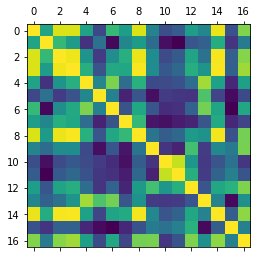

Text(0.5, -0.1, 'Correlation Matrix')

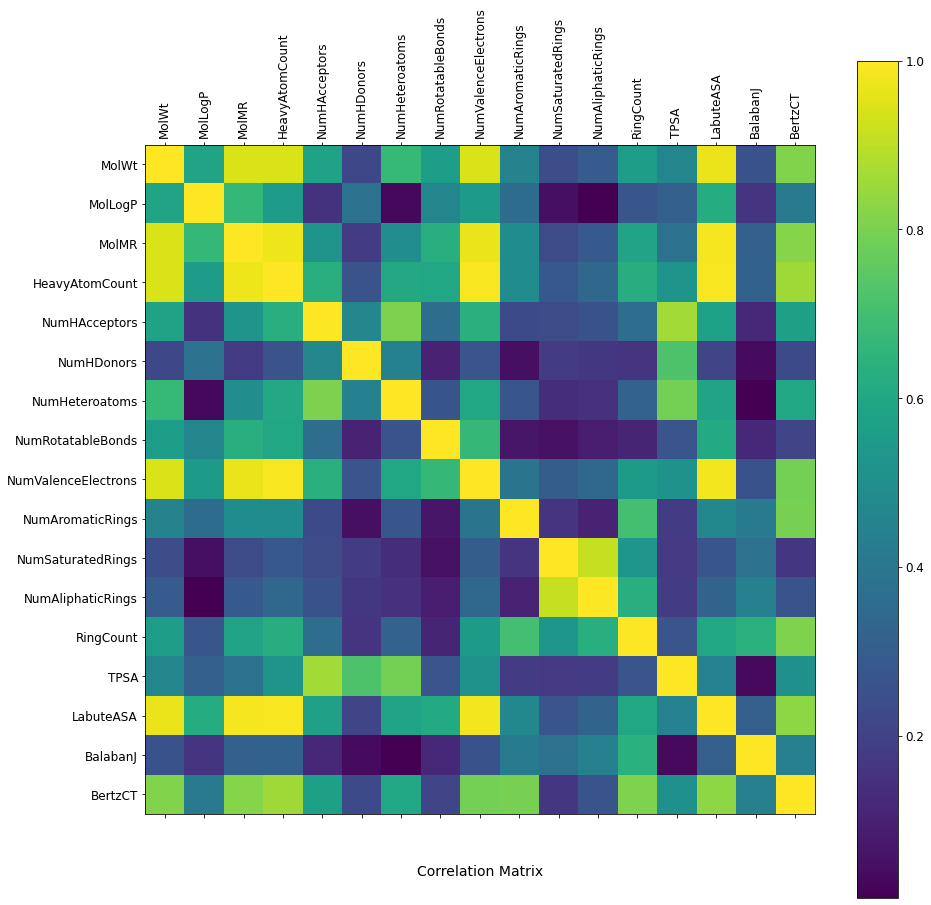

In [18]:
import matplotlib.pyplot as plt

plt.matshow(coef_correlacao)
plt.show()

f = plt.figure(figsize=(15, 15))
plt.matshow(coef_correlacao, fignum=f.number)
plt.xticks(range(coef_correlacao.shape[1]), coef_correlacao.columns, fontsize=12, rotation=90)
plt.yticks(range(coef_correlacao.shape[1]), coef_correlacao.columns, fontsize=12)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=14, y=-0.1)



# Padronização de dados

In [19]:
from sklearn.preprocessing import StandardScaler

dfxy_num_std = StandardScaler().fit_transform(dfxy_num.values)

pd.DataFrame(dfxy_num_std, index=df.index, columns=dfxy_num.columns)


,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
Name,,,,,,,,,,,,,,,,,
Benzo[cd]indol-2(1H)-one,-0.594386,-0.008099,-0.341745,-0.368050,-0.866804,-0.022512,-0.824127,-0.798440,-0.558997,0.887017,-0.361646,0.539388,1.076802,-0.571023,-0.469208,-0.146158,0.261130
4-chlorobenzaldehyde,-0.820729,-0.111714,-0.780343,-0.825833,-0.866804,-0.786357,-0.824127,-0.585586,-0.899114,-0.014974,-0.361646,-0.442639,-0.328340,-0.860985,-0.797088,0.428778,-0.616499
"4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}methyl)-N,N-bis(oxiran-2-ylmethyl)aniline",1.409604,0.024624,1.614393,1.691977,1.253156,-0.786357,0.498390,1.755810,1.609244,0.887017,4.372790,3.485468,3.184514,0.091817,1.623333,-2.164925,0.996841
vinyltoluene,-0.997839,0.087129,-0.651327,-0.825833,-1.290796,-0.786357,-1.485386,-0.585586,-0.899114,-0.014974,-0.361646,-0.442639,-0.328340,-1.272427,-0.844064,0.510924,-0.592687
3-(3-ethylcyclopentyl)propanoic acid,-0.585930,0.103298,-0.455587,-0.482496,-0.866804,-0.022512,-0.824127,0.052977,-0.388939,-0.916964,0.821963,0.539388,-0.328340,-0.373376,-0.492651,-0.735066,-0.755135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phenobarbital,-0.095600,-0.706417,-0.103216,0.089734,-0.018820,0.741333,0.167761,-0.372732,-0.006308,-0.014974,0.821963,0.539388,0.374231,0.541824,-0.023264,-0.209504,0.120498
pindolol,0.031652,-0.212831,0.270884,0.204180,-0.018820,1.505178,-0.162869,0.478685,0.206264,0.887017,-0.361646,-0.442639,0.374231,0.108207,0.146658,-1.046966,0.210007
procaine,-0.063357,-0.269431,0.153987,0.089734,0.405172,-0.022512,-0.162869,0.478685,0.121235,-0.014974,-0.361646,-0.442639,-0.328340,0.066749,0.057362,-0.433822,-0.211824


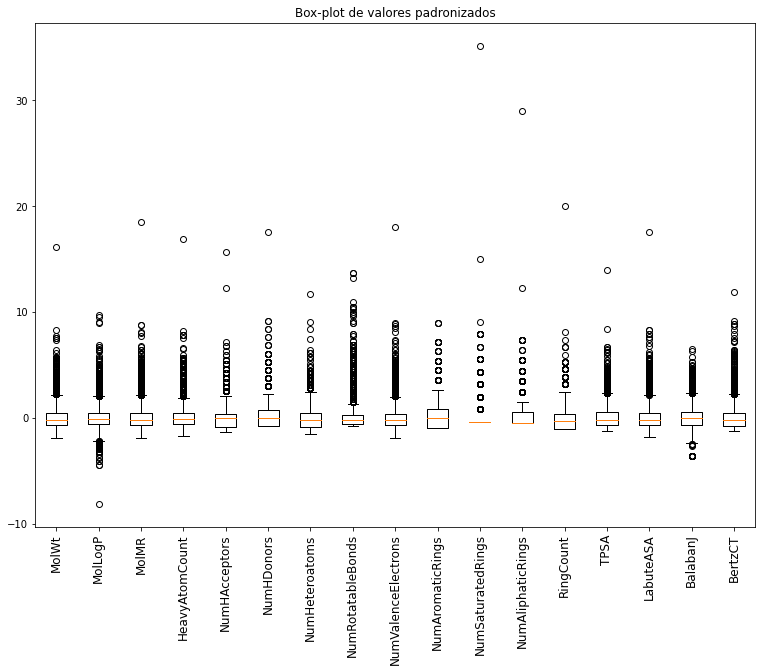

In [20]:
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(dfxy_num_std) 

x_sticks=[]

for i in range(17):
    x_sticks.append(i+1)

name_var=[]
for j in dfxy_num.columns:
    name_var.append(j)

plt.xticks(x_sticks,  name_var, fontsize=12, rotation=90)

plt.title ('Box-plot de valores padronizados')
plt.show()

# Transformações lineares

TL - Ortogonais

Análise de componentes principais (ACP)

In [21]:
pip install chart_studio

     |████████████████████████████████| 64 kB 1.9 MB/s 


Eigenvalues in descending order:
8.533118539021757
2.6373154081187833
2.421497353258147
1.6343874582794182
0.6121115065058467
0.4770160611228718
0.2755965518088725
0.12456509427966123
0.08118114753606281
0.07167438933174713
0.07011683962758151
0.03194083066994635
0.01997655176656144
0.008878381244003135
0.0020135139566829327
0.0006556092757170093
4.736062017015574e-16

% Variância: 
PC1 = 50
PC2 = 15
PC3 = 14
PC4 = 9
PC5 = 3

% Variância Acumulada: 
PC1 = 50
PC2 = 65
PC3 = 79
PC4 = 89
PC5 = 93


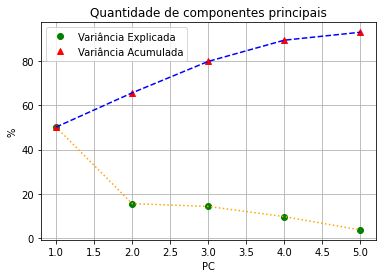

In [22]:
import numpy as np


mean_vec = np.mean(dfxy_num_std, axis=0)
cov_mat = (dfxy_num_std - mean_vec).T.dot((dfxy_num_std - mean_vec)) / (dfxy_num_std.shape[0]-1)

cov_mat = np.cov(dfxy_num_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

u,s,v = np.linalg.svd(dfxy_num_std.T)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x:x[0])
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

#-----------------------------------------------------------------

import chart_studio.plotly  as py
import numpy as np
import matplotlib.pyplot as plt

qtd_eig_vals = 5 ## equivalente aos 5 primeiros maiores autovalores
eig_vals_decrescente = sorted(eig_vals, reverse=True)
eig_vals_fatiado = eig_vals_decrescente[0:(qtd_eig_vals)]

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in eig_vals_fatiado]
cum_var_exp = np.cumsum(var_exp)

var_exp_linha = [1, 2, 3, 4, 5]

plt.plot( var_exp_linha, var_exp, 'go', label='Variância Explicada') # green bolinha
plt.plot( var_exp_linha, var_exp, 'k:', color='orange') # linha pontilha orange

plt.plot( var_exp_linha, cum_var_exp, 'r^' , label='Variância Acumulada') # red triangulo
plt.plot( var_exp_linha, cum_var_exp, 'k--', color='blue')  # linha tracejada azul

plt.title("Quantidade de componentes principais")

cont=0
print()
print("% Variância: ")
for i in var_exp:
    cont=cont+1
    print("PC%i = %i" %(cont, i))

cont=0
print()
print("% Variância Acumulada: ")
for i in cum_var_exp:
    cont=cont+1
    print("PC%i = %i" %(cont, i))

plt.grid(True)
plt.legend()
plt.xlabel("PC")
plt.ylabel("%")
plt.show()




https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

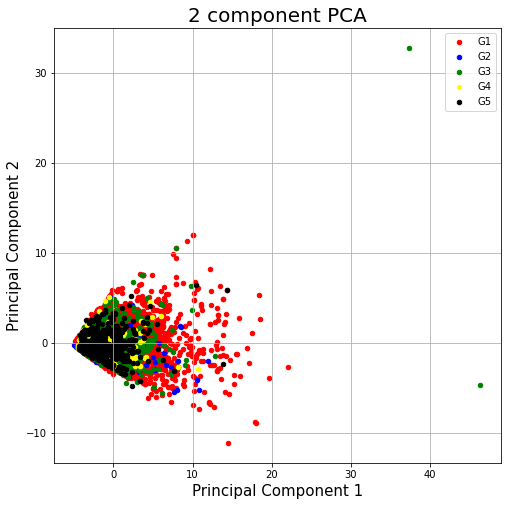

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# load dataset into Pandas DataFrame
df_PCA = pd.read_excel (data_file)

features = ['MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors',
            'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
            'NumSaturatedRings', 'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ', 'BertzCT']


# Separating out the features
x = df_PCA.loc[:, features].values
# Separating out the target
y = df_PCA.loc[:,['Group']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df_PCA[['Group']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['G1', 'G2', 'G3', 'G4', 'G5']
colors = ['red', 'blue', 'green', 'yellow', 'black']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Group'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 20)
    
ax.legend(targets)
ax.grid()


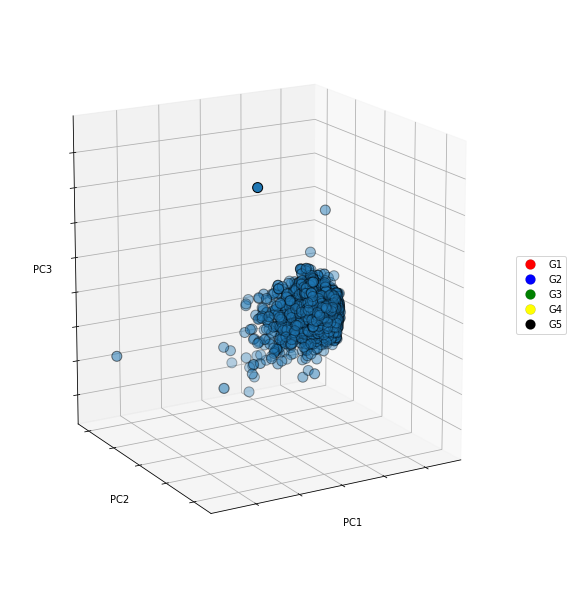

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets


centers = [[1, 1], [-1, -1], [1, -1]]

X = x
y = targets

fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .7, 1], elev=15, azim=60)

pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
   
# Reorder the labels to have colors matching the cluster results

sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], edgecolor='k', s = 100)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

custom_lines = [plt.Line2D([],[], ls="", marker='.', mec='k', mfc=c, mew=.1, ms=20) for c in colors]

ax.legend(custom_lines, [lt for lt in targets], loc='center left', bbox_to_anchor=(1.0, .5))

plt.show()

# ACP para exibição de registros anômalos - iForest


# Divisão em treino e teste

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(dfxy_num, dfy, test_size=0.2, random_state=None)

#print(np.mean(X_train), np.mean(y_train))
#print(len(X_train), len(y_train))
print(y_train.values)

[[-3.01      ]
 [-1.2557    ]
 [-1.62166471]
 ...
 [-1.3486    ]
 [-0.62      ]
 [-5.08968614]]


# Regressão linear


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [28]:
history_metrics = {}
history_metrics.clear()
history_metrics = {"r2_hist": [], "mae_hist": [], "mape_hist": [], "rmse_hist": [] }
history_metodos = {"nomes": []}

In [29]:
def calcula_metricas(dfxy_num, dfy, Y_NEW, metodo):

  r2 = r2_score(dfy.values,Y_NEW)
  mae = mean_absolute_error(dfy.values, Y_NEW)
  mape = mean_absolute_percentage_error(dfy.values, Y_NEW)
  rmse = np.sqrt(mean_squared_error(dfy.values,Y_NEW))

  history_metrics["r2_hist"].append(r2)
  history_metrics["mae_hist"].append(mae)
  history_metrics["mape_hist"].append(mape)
  history_metrics["rmse_hist"].append(rmse)
  history_metodos["nomes"].append(metodo)

  print(metodo)
  print('R2: ', r2)
  print('MAE: ', mae)
  print('MAPE: ', mape)
  print('RMSE: ', rmse)
  print('\n')

In [30]:
def mean_absolute_percentage_error(y_true, y_pred): 
  y_true, y_pred = np.array(y_true), np.array(y_pred) 
  soma = 0

  for i in range(0, len(y_true)-1):
    subtrai = np.abs(y_true[i] - y_pred[i])
    divisao = subtrai / np.abs(y_true[i])
    soma += divisao

  mape = soma / len(y_true)
  return mape * 100

In [31]:
regLinear = LinearRegression().fit(X_train, y_train)

print(features, "\n")

print("Coeficientes lineares:")
print(regLinear.coef_, "\n")
print("intercepção:")
print(regLinear.intercept_, "\n")

Y_NEW = regLinear.predict(X_train)

calcula_metricas(X_train, y_train, Y_NEW, "Regressao Linear")

['MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings', 'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ', 'BertzCT'] 

Coeficientes lineares:
[[-6.05260969e-04 -6.68650547e-01  6.00320316e-02 -1.13377478e-01
   2.71762461e-02  7.41154078e-02 -1.56657763e-02  4.40815291e-02
   4.69363603e-02 -1.40960630e-01  1.06772137e-01  1.18789774e-03
  -1.39772732e-01 -6.84771559e-03 -7.07928599e-02  1.84460349e-01
   1.16284673e-03]] 

intercepção:
[-0.90134989] 

Regressao Linear
R2:  0.663571288929744
MAE:  1.0056599946514053
MAPE:  [147.29657245]
RMSE:  1.3511870312335719




# Regressão polinomial


In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
print(features, "\n")
  
# Grau 2
polynomial_features = PolynomialFeatures(degree = 2)
X_TRANSF = polynomial_features.fit_transform(X_train)
  
regPolynomial_2 = LinearRegression().fit(X_TRANSF, y_train)
Y_NEW = regPolynomial_2.predict(X_TRANSF)
  
calcula_metricas(X_train, y_train, Y_NEW, "Regressao Polinomial-Grau: 2")

# Grau 3
polynomial_features = PolynomialFeatures(degree = 3)
X_TRANSF = polynomial_features.fit_transform(X_train)
  
regPolynomial_3 = LinearRegression().fit(X_TRANSF, y_train)
Y_NEW = regPolynomial_3.predict(X_TRANSF)
  
calcula_metricas(X_train, y_train, Y_NEW, "Regressao Polinomial-Grau: 3")



# Grau 4
polynomial_features = PolynomialFeatures(degree = 4)
X_TRANSF = polynomial_features.fit_transform(X_train)
  
regPolynomial_4 = LinearRegression().fit(X_TRANSF, y_train)
Y_NEW = regPolynomial_4.predict(X_TRANSF)
  
calcula_metricas(X_train, y_train, Y_NEW, "Regressao Polinomial-Grau: 4")

# Grau 5
polynomial_features = PolynomialFeatures(degree = 5)
X_TRANSF = polynomial_features.fit_transform(X_train)
  
regPolynomial_5 = LinearRegression().fit(X_TRANSF, y_train)
Y_NEW = regPolynomial_5.predict(X_TRANSF)
  
calcula_metricas(X_train, y_train, Y_NEW, "Regressao Polinomial-Grau: 5")


['MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings', 'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ', 'BertzCT'] 

Regressao Polinomial-Grau: 2
R2:  0.7883049684356912
MAE:  0.7971628216290371
MAPE:  [124.6070443]
RMSE:  1.0718259684317057


Regressao Polinomial-Grau: 3
R2:  0.8800955356023406
MAE:  0.5957386047590675
MAPE:  [81.0439396]
RMSE:  0.8066527506663829


Regressao Polinomial-Grau: 4
R2:  0.9775376364855326
MAE:  0.2320959187191065
MAPE:  [28.56690381]
RMSE:  0.34913763679319604


Regressao Polinomial-Grau: 5
R2:  0.9898548931895298
MAE:  0.12414636480020934
MAPE:  [16.49189091]
RMSE:  0.23463740897562127




# Máquina de vetor de suporte – Polinomial e Base Radial


In [34]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [35]:
#SVR base polinomial

regSVR_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, 
                                                  cache_size=200, verbose=False, max_iter=- 1))
regSVR_poly.fit(X_train, y_train)

Y_NEW = regSVR_poly.predict(X_train)

calcula_metricas(X_train, y_train, Y_NEW, "SVR-Polinomial")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR-Polinomial
R2:  0.44867084164646986
MAE:  1.271130558228982
MAPE:  [201.41650375]
RMSE:  1.7297144887000435




In [36]:
#SVR base radial

regSVR_RBF = make_pipeline(StandardScaler(), SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, 
                                                  cache_size=200, verbose=False, max_iter=- 1))
regSVR_RBF.fit(X_train, y_train)

Y_NEW = regSVR_RBF.predict(X_train)

calcula_metricas(X_train, y_train, Y_NEW, "SVR-Radial")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR-Radial
R2:  0.8069706267781044
MAE:  0.7040136996490086
MAPE:  [102.23186913]
RMSE:  1.0234830215482722




# Aprendizado de conjunto – Floresta Aleatória


In [37]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
regRF = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             bootstrap=True, oob_score=False, 
                             n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
regRF.fit(X_train, y_train)

Y_NEW = regRF.predict(X_train)

calcula_metricas(X_train, y_train, Y_NEW, "Florestas Aleatórias")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Florestas Aleatórias
R2:  0.9729948425412384
MAE:  0.2646629247405796
MAPE:  [32.86441913]
RMSE:  0.38281795529168117




# Rede Neural Multicamada - Perceptron


In [45]:
from sklearn.neural_network import MLPRegressor

In [46]:
regrMLP = MLPRegressor(hidden_layer_sizes=100, activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
                       learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True,
                       random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                       early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

regrMLP.fit(X_train, y_train)

Y_NEW = regrMLP.predict(X_train)

calcula_metricas(X_train, y_train, Y_NEW, "Rede Neural-MLP")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Rede Neural-MLP
R2:  0.6699078772652622
MAE:  1.0115521620780565
MAPE:  [109.11507449]
RMSE:  1.338401832581728




# Resumo das métricas - R2, MAE, MAPE, RMSE

In [47]:
import matplotlib.pyplot as plt

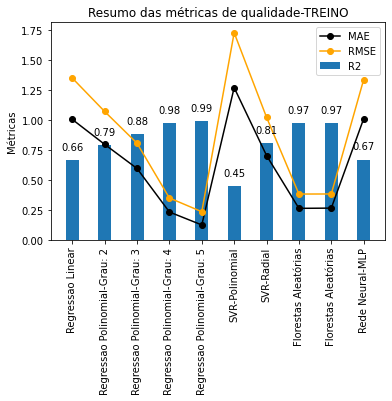

In [48]:
r2_valores = history_metrics['r2_hist']
mae_valores = history_metrics['mae_hist']
rmse_valores = history_metrics['rmse_hist']
nomes_metodos = history_metodos['nomes']

n_treino = len(nomes_metodos)

X_axis = np.arange(len(nomes_metodos))
  
plt.bar(X_axis, r2_valores, 0.4, label = 'R2')
plt.plot( mae_valores,  label = 'MAE', color = 'black', marker='o')
plt.plot(rmse_valores, label = 'RMSE', color='orange', marker='o')

for x,y in zip(X_axis, r2_valores):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.xticks(X_axis, nomes_metodos, rotation = 90)
plt.ylabel("Métricas")
plt.title("Resumo das métricas de qualidade-TREINO")
plt.legend()
plt.show()

# Treino com modelo

In [49]:
test_history_metrics = {}
test_history_metrics.clear()
test_history_metrics = {"r2_hist": [], "mae_hist": [], "mape_hist": [], "rmse_hist": [] }
test_history_metodos = {"nomes": []}

In [50]:
# Regressao Linear
Y_NEW = regLinear.predict(X_test)
calcula_metricas(X_test, y_test, Y_NEW, "Regressao Linear-Teste")

# Regressao Polinomial
polynomial_features = PolynomialFeatures(degree = 2)
X_TRANSF_test = polynomial_features.fit_transform(X_test)
Y_NEW = regPolynomial_2.predict(X_TRANSF_test)
calcula_metricas(X_TRANSF, y_test, Y_NEW, "Regressao Polinomial-Grau: 2-Teste")

polynomial_features = PolynomialFeatures(degree = 3)
X_TRANSF_test = polynomial_features.fit_transform(X_test)
Y_NEW = regPolynomial_3.predict(X_TRANSF_test)
calcula_metricas(X_TRANSF, y_test, Y_NEW, "Regressao Polinomial-Grau: 3-Teste")


polynomial_features = PolynomialFeatures(degree = 4)
X_TRANSF_test = polynomial_features.fit_transform(X_test)
Y_NEW = regPolynomial_4.predict(X_TRANSF_test)
calcula_metricas(X_TRANSF, y_test, Y_NEW, "Regressao Polinomial-Grau: 4-Teste")

polynomial_features = PolynomialFeatures(degree = 5)
X_TRANSF_test = polynomial_features.fit_transform(X_test)
Y_NEW = regPolynomial_5.predict(X_TRANSF_test)
calcula_metricas(X_TRANSF, y_test, Y_NEW, "Regressao Polinomial-Grau: 5-Teste")


# SVR-Polinomial
Y_NEW = regSVR_poly.predict(X_test)
calcula_metricas(X_test, y_test, Y_NEW, "SVR-Polinomial-Teste")

# SVR-Radial
Y_NEW = regSVR_RBF.predict(X_test)
calcula_metricas(X_test, y_test, Y_NEW, "SVR-Radial-Teste")

# Florestas Aleatórias
Y_NEW = regRF.predict(X_test)
calcula_metricas(X_test, y_test, Y_NEW, "Florestas Aleatórias-Teste")

# Rede Neural-MLP
Y_NEW = regrMLP.predict(X_test)
calcula_metricas(X_test, y_test, Y_NEW, "Rede Neural-MLP-Teste")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


Regressao Linear-Teste
R2:  0.6744774742702373
MAE:  1.0363471802166404
MAPE:  [inf]
RMSE:  1.369086127537733


Regressao Polinomial-Grau: 2-Teste
R2:  0.7466402752652734
MAE:  0.8411614903742518
MAPE:  [inf]
RMSE:  1.2078389650973107


Regressao Polinomial-Grau: 3-Teste
R2:  -7.165081227023244
MAE:  1.093584291757802
MAPE:  [inf]
RMSE:  6.856784516510286


Regressao Polinomial-Grau: 4-Teste
R2:  -53285.44581714834
MAE:  28.326311154374096
MAPE:  [inf]
RMSE:  553.922011940715




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


Regressao Polinomial-Grau: 5-Teste
R2:  -456957.4199708082
MAE:  119.75018865581193
MAPE:  [inf]
RMSE:  1622.1036020922024




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


SVR-Polinomial-Teste
R2:  0.32575852074422995
MAE:  1.3661919877476736
MAPE:  [inf]
RMSE:  1.9703708780285136




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


SVR-Radial-Teste
R2:  0.7748175470059894
MAE:  0.7760762531589194
MAPE:  [inf]
RMSE:  1.1386952775547292


Florestas Aleatórias-Teste
R2:  0.803664902999297
MAE:  0.725189069677277
MAPE:  [inf]
RMSE:  1.063259366779591


Rede Neural-MLP-Teste
R2:  0.6550173960215325
MAE:  1.0407967240722826
MAPE:  [inf]
RMSE:  1.409414855219518




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


# Resumo das métricas Teste - R2, MAE, MAPE, RMSE

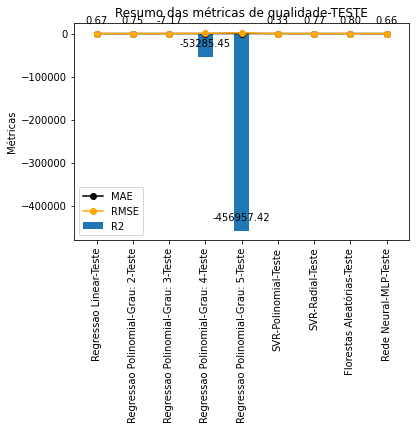

In [51]:
#history_metrics = {"r2_hist": [], "mae_hist": [], "mape_hist": [], "rmse_hist": [] }
#history_metodos = {"nomes": []}

r2_valores = history_metrics['r2_hist'][n_treino::]
mae_valores = history_metrics['mae_hist'][n_treino::]
rmse_valores = history_metrics['rmse_hist'][n_treino::]
nomes_metodos = history_metodos['nomes'][n_treino::]

X_axis = np.arange(len(nomes_metodos))

plt.bar(X_axis, r2_valores, 0.4, label = 'R2')
plt.plot(mae_valores,  label = 'MAE', color = 'black', marker='o')
plt.plot(rmse_valores, label = 'RMSE', color='orange', marker='o')


for x,y in zip(X_axis, r2_valores):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.xticks(X_axis, nomes_metodos, rotation = 90)
plt.ylabel("Métricas")
plt.title("Resumo das métricas de qualidade-TESTE")
plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


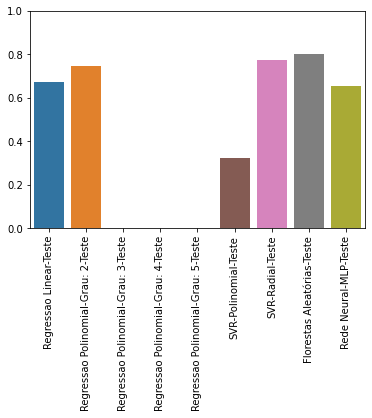

In [52]:
chart = sns.barplot(nomes_metodos, r2_valores, )
chart.set(ylim=(0, 1))

for item in chart.get_xticklabels():
    item.set_rotation(90)



# Menores erros - Random Forest

In [54]:
#y_test=y_test.drop("Erros (percentual)", 1)

In [55]:
y_calculado = regRF.predict(X_test)
y_calculado_rows = [[y_calculado[i]] for i in range(len(y_calculado))]

erros = np.abs(100* (y_calculado_rows - y_test.values) / y_test.values)
y_test["Erros (percentual)"] = erros
erros_abs_medio = np.abs(erros)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [56]:
y_test.sort_values(by=['Erros (percentual)'], inplace=True)
pd.set_option('display.max_rows', y_test.shape[0]+1)
print("Erro abs médio =", erros_abs_medio)
y_test

Erro abs médio = [[ 6.72537773]
 [ 2.25586023]
 [45.88867746]
 ...
 [25.42413104]
 [ 3.30044553]
 [ 4.39497635]]


,Solubility,Erros (percentual)
Name,,
"4-[[4-(5-phenyl-1,3-oxazol-2-yl)phenyl]methyl]morpholine",-4.350000,4.134129e-02
"2,3-dichlorobutane",-2.354100,1.012956e-01
chloridazon,-2.743600,1.058128e-01
2-decyltetradecanoic acid,-5.867640,1.170978e-01
"(4E)-3-methyl-5-(2,2,3-trimethylcyclopent-3-en-1-yl)pent-4-en-2-ol",-3.786029,1.349979e-01
"2,2',3,3',5,6'-hexachlorobiphenyl",-7.821800,1.421412e-01
"2,6-dimethyloctan-2-ol",-2.749345,1.705062e-01
Methyl nonanoate,-3.380000,1.791003e-01
2-ethylhexyl octadecanoate,-6.899492,1.861751e-01


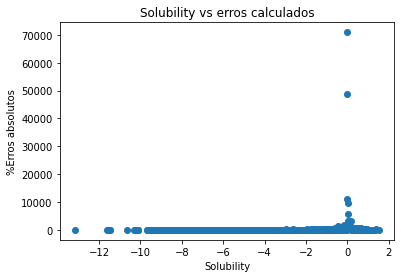

In [67]:
plt.scatter(y_test['Solubility'], y_test['Erros (percentual)'])
plt.title("Solubility vs erros calculados")
plt.xlabel("Solubility")
plt.ylabel("%Erros absolutos")
plt.show()

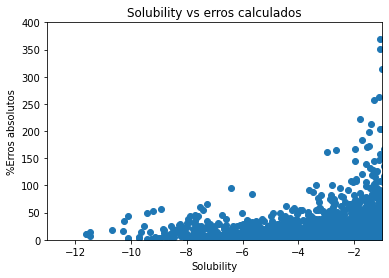

In [68]:
plt.scatter(y_test['Solubility'], y_test['Erros (percentual)'])
plt.title("Solubility vs erros calculados")
plt.xlabel("Solubility")
plt.ylabel("%Erros absolutos")
plt.xlim(-13, -1)
plt.ylim(0, 400)
plt.show()

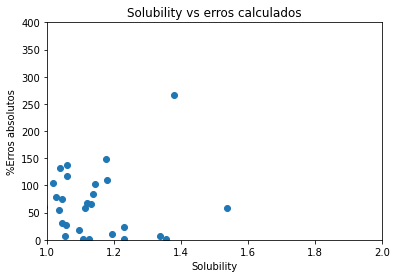

In [74]:
plt.scatter(y_test['Solubility'], y_test['Erros (percentual)'])
plt.title("Solubility vs erros calculados")
plt.xlabel("Solubility")
plt.ylabel("%Erros absolutos")
plt.xlim(1, 2)
plt.ylim(0, 400)
plt.show()